In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [54]:
bitcoin_df=pd.read_csv("/kaggle/input/bitcoindataanalysis/BTC-USD Daily - 2014-2024.csv")
ethereum_df=pd.read_csv("/kaggle/input/bitcoindataanalysis/ETH-USD Daily 2017-2024.csv")


# # Machine learning on bitcoin data

In [44]:
bitcoin_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
3577,2024-07-03,62034.332031,62187.703125,59419.386719,60173.921875,60173.921875,29756701685
3578,2024-07-04,60147.136719,60399.675781,56777.804688,56977.703125,56977.703125,41149609230
3579,2024-07-05,57022.808594,57497.152344,53717.375000,56662.375000,56662.375000,55417544033
3580,2024-07-06,56659.074219,58472.546875,56038.960938,58303.539063,58303.539063,20610320577


In [45]:
bitcoin_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [55]:
bitcoin_df["Date_time"]=pd.to_datetime(bitcoin_df["Date"],errors='coerce')
bitcoin_df=bitcoin_df.drop(columns=["Date"])
bitcoin_df["Year"]=bitcoin_df["Date_time"].dt.year
bitcoin_df["Month"]=bitcoin_df["Date_time"].dt.month
bitcoin_df["Day"]=bitcoin_df["Date_time"].dt.day
bitcoin_df=bitcoin_df.drop(columns=["Date_time"])

In [56]:
bitcoin_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
Year           int32
Month          int32
Day            int32
dtype: object

<Axes: >

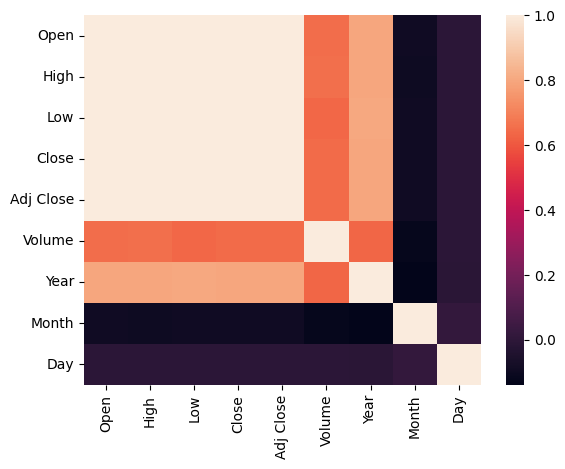

In [57]:
corr=bitcoin_df.corr()
sns.heatmap(corr)

In [59]:
X=bitcoin_df.drop(columns=["High","Low"])
Y=bitcoin_df[["High","Low"]]

In [80]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [81]:
random_reg=RandomForestRegressor(n_estimators=50)
random_reg.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=50)

score

In [82]:
random_reg.score(X_test,Y_test)

0.9994481182231305

# # prediction

In [85]:
y_pred=random_reg.predict(X_train.head(2))
y_pred

array([[ 1010.70336808,   984.17378762],
       [61996.57679672, 56685.62781228]])

In [86]:
X_train

,Open,Close,Adj Close,Volume,Year,Month,Day
881,991.734985,1004.549988,1004.549988,137946000,2017,2,14
2369,57343.371094,61243.085938,61243.085938,60669829814,2021,3,13
755,619.237976,641.072021,641.072021,103590000,2016,10,11
3288,26532.994141,26754.281250,26754.281250,15615339655,2023,9,18
1690,5769.202637,5831.167480,5831.167480,17567780766,2019,5,4
...,...,...,...,...,...,...,...
2143,11099.833008,11111.213867,11111.213867,22857247901,2020,7,30
2789,36042.503906,35501.953125,35501.953125,24375896406,2022,5,7
513,379.686005,384.263000,384.263000,67042800,2016,2,12
570,420.811005,419.411011,419.411011,49792700,2016,4,9


In [106]:
bitcoin_df["Low"].nunique()

3580

# # Deep Learning

In [125]:
from keras.layers import Dense,Dropout,Input
from keras.models import Sequential,Model
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [99]:
early_stopping=EarlyStopping(
monitor='val_loss',
patience=5,
verbose=1,
restore_best_weights=True)

In [93]:
X_train.shape

(2865, 7)

In [119]:
model=Sequential([
    Input(shape=(7,)),
    Dense(32,activation="relu",kernel_initializer="he_normal",bias_initializer='zeros'),
    Dense(64,activation="relu",kernel_initializer="he_normal",bias_initializer='zeros'),
    Dense(32,activation="relu",kernel_initializer="he_normal",bias_initializer='zeros'),
    Dense(2)
])

In [126]:
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # Lower learning rate and clip gradients
model.compile(optimizer=optimizer,loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(X_train,Y_train,epochs=100,batch_size=32,validation_data=(X_test,Y_test),callbacks=[early_stopping])

Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mean_absolute_error: nan - val_loss: nan - val_mean_absolute_error: nan
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


In [127]:
model.predict(X_train)

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)